In [ ]:
pip install unidecode

     |████████████████████████████████| 245kB 2.6MB/s 


In [ ]:
pip install pandas_profiling==2.7.1

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 604kB 7.0MB/s 
     |████████████████████████████████| 3.1MB 14.2MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 296kB 29.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=73f02b6f96a2fc720e9ea92c1df9c747561bbac9478b6df9a46acc2d0079f4c4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=055370b937a583573cb10fc6a08241c0c302c2fbfef28130a7c54c9f0ce9aa85
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv('./Hate.csv')
count_class_0,count_class_1=pd.value_counts(df['label'])
df_class_0=df[df['label']==0]
df_class_1=df[df['label']==1]

In [ ]:
#undersampling
#df_class_0_under=df_class_0.sample(count_class_1)
#df_main=pd.concat([df_class_0_under,df_class_1],axis=0)
#pd.value_counts(df_main['label'])
df_main=df

In [ ]:
pandas_profiling.ProfileReport(df_main)

In [ ]:
df_main.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_main.shape

(31962, 3)

In [ ]:
df_main.drop_duplicates(inplace=True)

In [ ]:
df_main.shape

(31962, 3)

In [ ]:
df_main['tweet'].isna().sum()

0

In [ ]:
df_main['label'].isna().sum()

0

In [ ]:
df_main['clean_tweet'] = df_main['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [ ]:
df_main.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df_main['clean_tweet'] = df_main['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet==("\d*")]))

In [ ]:
df_main.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df_main['clean_tweet']=df_main['clean_tweet'].apply(lambda x:' '.join(unidecode.unidecode(word) for word in x.split()))

In [ ]:
df_main.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df_main['clean_tweet']=df_main['clean_tweet'].apply(lambda x:' '.join(word for word in x.split() if not word.startswith('hmm')))

In [ ]:
df_main.head(30)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [ ]:
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
df_main['clean_tweet'] = df_main['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [ ]:
df_main.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df_main['#'] = df_main['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [ ]:
df_main.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
frame=df_main['#']
frame.head()

0                              #run
1    #lyft #disapointed #getthanked
2                                  
3                            #model
4                       #motivation
Name: #, dtype: object

In [ ]:
type(frame)

pandas.core.series.Series

In [ ]:
frame=pd.DataFrame(frame)

In [ ]:
frame = frame.rename({'#':'Count(#)'},axis = 'columns')

In [ ]:
frame.head()

,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [ ]:
frame[frame['Count(#)'] == ''] = 'No hashtags'

In [ ]:
data_frame=pd.concat((df_main,frame),axis=1)

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,#,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation,#motivation


In [ ]:
data_frame.drop('#',axis=1,inplace=True)

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
data_frame.rename({'Count(#)':'HashTags'},axis='columns',inplace=True)

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,HashTags
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,HashTags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [ ]:
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,HashTags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [ ]:
ps = PorterStemmer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,HashTags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [ ]:
tok = []
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    tok.append(tweet)

In [ ]:
len(tok)

31962

In [ ]:
pip install wordcloud

Normal words


(-0.5, 799.5, 499.5, -0.5)

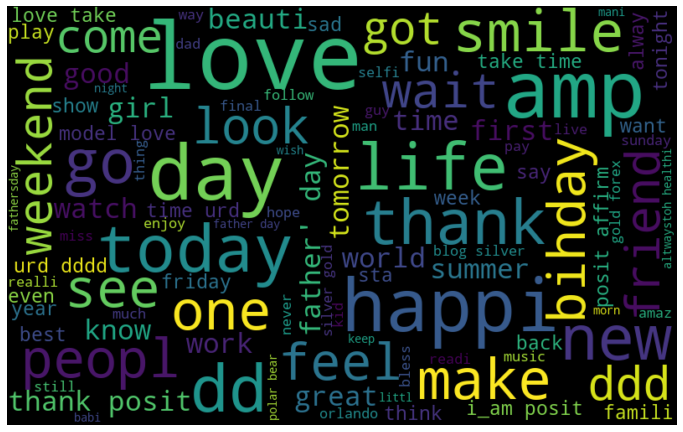

In [ ]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Not So Normal words


(-0.5, 799.5, 499.5, -0.5)

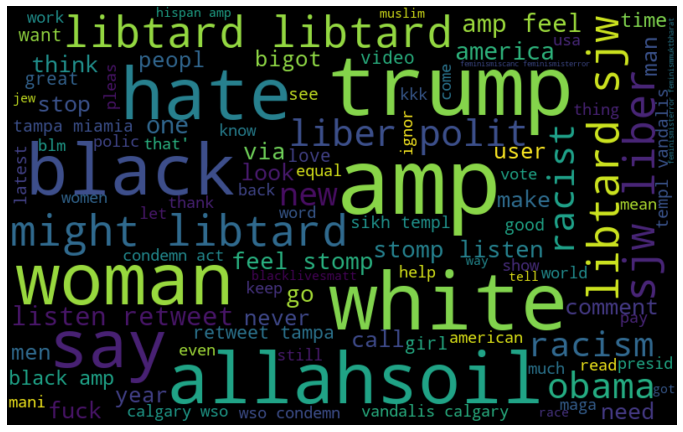

In [ ]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Not So Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [ ]:
hash_positive = []
hash_negative = []

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [ ]:
len(hash_positive)        

71499

In [ ]:
len(hash_negative)

4795